## Biological Interpretation

In [62]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from scipy.stats import pearsonr
import networkx as nx
from scipy.stats import hypergeom

In [2]:
data = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/sample_info.csv")

In [3]:
effect = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/Achilles_gene_effect.csv")

In [4]:
mapping = {}

for i in np.arange(0,data.shape[0],1):
    mapping[data.DepMap_ID[i]] = data.CCLE_Name[i]

effect["INDEX"] = effect.DepMap_ID
effect = effect.set_index('INDEX')
effect = effect.rename(index=mapping)

effect = effect.drop("DepMap_ID",1)

gene = effect.columns.to_list()
# split at space
for i in range(len(gene)):
    gene[i] = gene[i].split(" ") 

genes = []
for i in range(len(gene)):
    genes.append(gene[i][0])
    
effect.columns = genes

In [29]:
data.head()

,DepMap_ID,stripped_cell_line_name,CCLE_Name,Alias,COSMICID,sex,source,Achilles_n_replicates,cell_line_NNMD,culture_type,...,primary_or_metastasis,primary_disease,Subtype,age,Sanger_Model_ID,depmap_public_comments,lineage,lineage_subtype,lineage_sub_subtype,lineage_molecular_subtype
0,ACH-000001,NIHOVCAR3,NIHOVCAR3_OVARY,OVCAR3,905933.0,Female,ATCC,NaN,NaN,NaN,...,Metastasis,Ovarian Cancer,"Adenocarcinoma, high grade serous",60.0,SIDM00105,NaN,ovary,ovary_adenocarcinoma,high_grade_serous,NaN
1,ACH-000002,HL60,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,905938.0,Female,ATCC,NaN,NaN,NaN,...,Primary,Leukemia,"Acute Myelogenous Leukemia (AML), M3 (Promyelo...",35.0,SIDM00829,NaN,blood,AML,M3,NaN
2,ACH-000003,CACO2,CACO2_LARGE_INTESTINE,"CACO2, CaCo-2",NaN,Male,ATCC,NaN,NaN,NaN,...,NaN,Colon/Colorectal Cancer,Adenocarcinoma,NaN,SIDM00891,NaN,colorectal,colorectal_adenocarcinoma,NaN,NaN
3,ACH-000004,HEL,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,907053.0,Male,DSMZ,2.0,-3.079202,Suspension,...,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",30.0,SIDM00594,NaN,blood,AML,M6,NaN
4,ACH-000005,HEL9217,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,Male,ATCC,2.0,-2.404409,Mixed adherent and suspension,...,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",30.0,SIDM00593,NaN,blood,AML,M6,NaN


CDK4	RB1	-0.270088658037034	AB
CDK4	CDKN2C	-0.332894420570415	AB
CDK4	CCND1	0.383743671693837	BA
CDK6	CCND3	0.429610217617713	BA
CDK6	CCNE1	-0.291627386055655	BA
CDK6	CDK4	-0.166138251188281	BA
CDKN2A	CDKN2B	0.252271039837043	AB
CDKN2A	CCNE1	-0.164517699579397	BA

--------------------------------

NF2	AMOTL2	0.604088180582646	BA
NF2	KIRREL1	0.557319887509312	BA
NF2	TAOK1	0.537086753404031	AB
NF2	LATS2	0.522628225045063	BA
NF2	PTPN14	0.426594811534134	AB
NF2	PTEN	0.280261686290702	AB
NF2	ABL2	0.251003837455685	BA
NF2	RAC1	-0.345269416089392	AB    == in string
NF2	CRK	-0.404878434040191	BA        
NF2	DLG5	-0.405139954747337	BA
NF2	PKN2	-0.445751736055664	AB

In [6]:
effect = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/Achilles_gene_effect.csv")
data = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/sample_info.csv")

mapping = {}

for i in np.arange(0,data.shape[0],1):
    mapping[data.DepMap_ID[i]] = data.CCLE_Name[i]

effect["INDEX"] = effect.DepMap_ID
effect = effect.set_index('INDEX')
effect = effect.rename(index=mapping)
effect = effect.drop("DepMap_ID",1)

gene = effect.columns.to_list()
# split at space
for i in range(len(gene)):
    gene[i] = gene[i].split(" ") 

genes = []
for i in range(len(gene)):
    genes.append(gene[i][0])
                 
effect.columns = genes


cellLine = effect.index.to_list()
# split at space
for i in range(len(cellLine)):
    cellLine[i] = cellLine[i].split("_") 

cellLines = []
for i in range(len(cellLine)):
    cellLines.append(cellLine[i][0])
    
effect.index = cellLines

cellLine = data['CCLE_Name'].to_list()
# split at space
for i in range(len(cellLine)):
    cellLine[i] = cellLine[i].split("_") 

cellLines1 = []
for i in range(len(cellLine)):
    cellLines1.append(cellLine[i][0])
    
data['CCLE_Name'] = cellLines1


a = set(cellLines)
b = set(data["CCLE_Name"])
c = set.intersection(a,b)

print(len(a))
print(len(b))
print(len(c))

cellL = c

765
1781
765


In [9]:
data = pd.read_csv("/home/annerer/Downloads/elife-58925-supp1-v3.csv")

temp1 = data['CCLE_NAME'].to_list()
# split at space
for i in range(len(temp1)):
    temp1[i] = temp1[i].split("_") 

temp2 = []
for i in range(len(temp1)):
    temp2.append(temp1[i][0])

In [92]:
allGenes = effect[effect.columns.intersection(cellL)]

In [93]:
effect = effect.transpose()
intersect = list(set.intersection(set(allGenes.index.to_list()), set(cellL)))
allGenes = effect[effect.columns.intersection(cellL)]

allGenes.shape
allGenes = allGenes.transpose()

allGenes.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
HEL,0.178087,0.088290,-0.201464,-0.017011,0.042590,-0.192257,0.352891,-0.445209,0.292603,0.165168,...,-0.122795,-0.464567,NaN,NaN,0.258084,0.237593,-0.408563,0.291832,0.218575,-0.139759
HEL9217,-0.082364,0.239413,0.195457,0.163763,-0.188161,-0.338735,0.254489,-0.583878,-0.060615,0.015272,...,-0.195061,-0.408063,-0.155155,-0.067415,0.229242,-0.075883,-0.104001,0.075901,0.036985,-0.243303
LS513,0.070026,0.075066,-0.064637,0.156905,0.099075,0.141985,0.066314,-0.477023,-0.006855,0.291604,...,-0.093252,-0.276874,-0.049716,0.116683,0.211699,-0.012654,-0.351716,0.089140,-0.392549,-0.442624
C2BBE1,0.107048,-0.006352,-0.053166,0.053055,0.081620,-0.038305,0.082421,-0.642935,0.159178,0.064128,...,-0.280677,-0.230111,-0.106000,0.041611,0.083021,0.022771,-0.596777,0.197627,-0.106398,-0.549259
253J,0.280508,0.079860,0.016981,0.439139,-0.042239,-0.242560,0.103028,-0.419159,0.141445,0.115857,...,-0.410500,-0.507467,-0.138665,-0.119292,0.284407,0.158124,-0.240429,0.124847,-0.250949,-0.379117


In [161]:
def celllines_from_diff1(gene_a,gene_b):
    def diff(gene_a,gene_b):
        """ takes 2 genes and returns the cell lines
        for which those two genes have a high correlation
        or anticorrelation in gene effect"""
        diff = np.abs(effect[gene_a] - effect[gene_b])
        return (diff) 
    diff1 = diff(gene_a,gene_b)
    diff1_top = diff1.sort_values().tail(20).index.to_list()
    diff1_bottom = diff1.sort_values().head(20).index.to_list()
    print('first is top, second is bottom')
    plt.plot(diff1.sort_values())
    return([diff1_top,diff1_bottom])

def celllines_from_sums1(gene_a,gene_b):
        def summ(gene_a,gene_b):
            summ = np.abs(effect[gene_a] + effect[gene_b])
            return summ
        summ1 = summ(gene_a,gene_b)
        summ1_top = summ1.sort_values().tail(20).index.to_list()
        summ1_bottom = summ1.sort_values().head(20).index.to_list()
        print('first is top, second is bottom')
        return([summ1_top,summ1_bottom])

In [12]:
def celllines_from_diff(gene_a,gene_b):
    def diff(gene_a,gene_b):
        """ takes 2 genes and returns the cell lines
        for which those two genes have a high correlation
        or anticorrelation in gene effect"""
        diff = np.abs(allGenes[gene_a] - allGenes[gene_b])
        return (diff) 
    diff1 = diff(gene_a,gene_b)
    diff1_top = diff1.sort_values().tail(20).index.to_list()
    diff1_bottom = diff1.sort_values().head(20).index.to_list()
    #print('first is top, second is bottom')
    #plt.plot(diff1.sort_values())
    allGenesSet = set(allGenes.index.to_list())
    top_group1 = diff1_top
    top_group2 = list(allGenesSet.difference(set(top_group1)))
    #len(group2)
    bottom_group1 = diff1_bottom
    bottom_group2 = list(allGenesSet.difference(set(bottom_group1)))
    return([top_group1,top_group2,bottom_group1,bottom_group2,gene_a,gene_b])

def celllines_from_sums(gene_a,gene_b):
        def summ(gene_a,gene_b):
            summ = np.abs(allGenes[gene_a] + allGenes[gene_b])
            return summ
        summ1 = summ(gene_a,gene_b)
        summ1_top = summ1.sort_values().tail(20).index.to_list()
        summ1_bottom = summ1.sort_values().head(20).index.to_list()
        print('first is top, second is bottom')
        return([summ1_top,summ1_bottom])

In [61]:
uli_list1 = [['CDK4','RB1'],
['CDK4','CDKN2C'],
['CDK4','CCND1'],
['CDK6','CCND3'],
['CDK6','CCNE1'],
['CDK6','CDK4'],
['CDKN2A','CDKN2B'],
['CDKN2A','CCNE1']]


uli_list2 = [['NF2','AMOTL2'],
['NF2','KIRREL1'],
['NF2','TAOK1'],
['NF2','LATS2'],
['NF2','PTPN14'],
['NF2','PTEN'],
['NF2','ABL2'],
['NF2','RAC1'],
['NF2','CRK'],    
['NF2','DLG5'],
['NF2','PKN2']]

In [87]:
uli_list = [['CDK4','RB1'],['CDK4','CDKN2C'],['CDK4','CCND1'],['CDK6','CCND3'],['CDK6','CCNE1'],['CDK6','CDK4'],['CDKN2A','CDKN2B'],
['CDKN2A','CCNE1'],['NF2','AMOTL2'],['NF2','KIRREL1'],['NF2','TAOK1'],['NF2','LATS2'],['NF2','PTPN14'],['NF2','PTEN'],['NF2','ABL2'],['NF2','RAC1'],['NF2','CRK'],['NF2','DLG5'],['NF2','PKN2']]

In [226]:
column_names_uli_list = ['CDK4/RB1','CDK4/CDKN2C','CDK4/CCND1','CDK6/CCND3','CDK6/CCNE1','CDK6/CDK4','CDKN2A/CDKN2B',
'CDKN2A/CCNE1','NF2/AMOTL2','NF2/KIRREL1','NF2/TAOK1','NF2/LATS2','NF2/PTPN14','NF2/PTEN','NF2/ABL2','NF2/RAC1','NF2/CRK','NF2/DLG5','NF2/PKN2']

In [89]:
allGenesSet = set(allGenes.columns)
group2 = allGenesSet.difference(set(a))

len(group2)

NameError: name 'allGenes' is not defined

In [75]:
allGenes.columns = group2

In [122]:
allGenes.shape

(783, 18119)

In [77]:
allGenes.head()

,SNX13,BSX,SEPT3,DGKZ,COPS7B,SPNS2,SRRM4,NPAS1,CTTNBP2NL,C19orf53,...,TMOD2,TOM1,TRPV3,ADGRF1,DAXX,LACRT,MNT,KRTAP21-2,USP40,ABI1
HEL,0.178087,0.088290,-0.201464,-0.017011,0.042590,-0.192257,0.352891,-0.445209,0.292603,0.165168,...,-0.122795,-0.464567,NaN,NaN,0.258084,0.237593,-0.408563,0.291832,0.218575,-0.139759
HEL9217,-0.082364,0.239413,0.195457,0.163763,-0.188161,-0.338735,0.254489,-0.583878,-0.060615,0.015272,...,-0.195061,-0.408063,-0.155155,-0.067415,0.229242,-0.075883,-0.104001,0.075901,0.036985,-0.243303
LS513,0.070026,0.075066,-0.064637,0.156905,0.099075,0.141985,0.066314,-0.477023,-0.006855,0.291604,...,-0.093252,-0.276874,-0.049716,0.116683,0.211699,-0.012654,-0.351716,0.089140,-0.392549,-0.442624
C2BBE1,0.107048,-0.006352,-0.053166,0.053055,0.081620,-0.038305,0.082421,-0.642935,0.159178,0.064128,...,-0.280677,-0.230111,-0.106000,0.041611,0.083021,0.022771,-0.596777,0.197627,-0.106398,-0.549259
253J,0.280508,0.079860,0.016981,0.439139,-0.042239,-0.242560,0.103028,-0.419159,0.141445,0.115857,...,-0.410500,-0.507467,-0.138665,-0.119292,0.284407,0.158124,-0.240429,0.124847,-0.250949,-0.379117


*    M is the population size
*    n is the number of successes in the population
*    N is the sample size
*    X is still the number of drawn “successes”

pval = hypergeom.sf(4, 783, 121, 20)
pval

In [ ]:
from scipy.stats import hypergeom
pval = hypergeom.sf(x-1, M, n, N)

In [80]:
from scipy.stats import hypergeom
pval = hypergeom.sf(12-1, 18000, 2000, 20)
pval

1.8349602035035028e-07

In [104]:
#hits = count / len(sample)   - it's just count
# totalCount
len(allGenes.index.to_list())

783

In [108]:
pval = hypergeom.sf(4, 783, 121, 20)
pval

0.1835365353530391

In [60]:
def get_hypergeometric_p_values(count,totalCount,sample_size=20):
    count = count - 1
    pval = hypergeom.sf(count, 783, totalCount, sample_size)
    return pval

In [101]:
def get_hypergeometric_p_values2(t1,t2,b1,b2,sample_size=20):
    t1 = t1 - 1
    b1 = b1 - 1
    pval1 = hypergeom.sf(t1, 783, t2, sample_size)
    pval2 = hypergeom.sf(b1, 783, b2, sample_size)

    return [pval1,pval2]

In [121]:
sample_size = len(top)
get_hypergeometric_p_values(count,totalCount,sample_size)

0.1835365353530391

### functions i need: 
   * celllines from diffs + splitting function
   * get_hypergeometric_p_values
   * np.sort, or df.sort_by() after converting to DataFrame

In [148]:
data.head()

,CCLE_NAME,TISSUE_FACTOR,MSI,ACVR1B_mut_del,APC_mut_del,ARID1A_mut_del,ATM_mut_del,ATRX_mut_del,AXIN1_mut_del,BAP1_mut_del,...,PIK3CA_mut,BRAF_mut,CTNNB1_mut,KRAS_mut,NRAS_mut,GNAS_mut,HRAS_mut,EGFR_mut,MAP2K1_mut,PTPN11_mut
0,MOLM16_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PATU8988S_PANCREAS,PANCREAS,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,RCHACV_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,SKMEL31_SKIN,SKIN,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,SKBR3_BREAST,BREAST,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [171]:
t1,t2,b1,b2,gene_a,gene_b = celllines_from_diff('CDK4','CDKN2C')

first is top, second is bottom


In [156]:


#get_hypergeometric_p_values(counting_hits(cellines_from_diff(GENE1,GENE2),'MUTATION'))

get_hypergeometric_p_values(1,26)

0.49533812655326986

## All the functions combined

In [195]:
#len(uli_list) = 19
a,b = uli_list[16]
mut = "CTNNB1_mut"
t1,t2,b1,b2,gene_a,gene_b = celllines_from_diff(a,b)
top1,top2,bot1,bot2 = counting_hits(t1,t2,b1,b2,mut)
print('for genes ', a, ' and ', b, 'the hypergeometric p value that either top or bottom are enriched in ', mut, ' is ')
get_hypergeometric_p_values2(top1,top2,bot1,bot2)

for genes  NF2  and  CRK the hypergeometric p value that either top or bottom are enriched in  CTNNB1_mut  is 


[1.0, 0.040567230594045746]

In [250]:
a,b = uli_list[6]
mut = "TP53_mut_del"
t1,t2,b1,b2,gene_a,gene_b = celllines_from_diff(a,b)
top1,top2,bot1,bot2 = counting_hits(t1,t2,b1,b2,mut)
print('for genes ', a, ' and ', b, 'the hypergeometric p value that either top or bottom are enriched in ', mut, ' is ')
get_hypergeometric_p_values2(top1,top2,bot1,bot2)

for genes  CDKN2A  and  CDKN2B the hypergeometric p value that either top or bottom are enriched in  TP53_mut_del  is 


[0.9894885815375278, 0.0]

In [213]:
p_values = []
#len(uli_list) = 19
# for all 68 background in second loop
#now only the (sensible) cuttoff matters
for _ in uli_list:
    a,b = _
    mut = "CTNNB1_mut"
    t1,t2,b1,b2,gene_a,gene_b = celllines_from_diff(a,b)
    top1,top2,bot1,bot2 = counting_hits(t1,t2,b1,b2,mut)
    #print('for genes ', a, ' and ', b, 'the hypergeometric p value that either top or bottom are enriched in ', mut, ' is ')
    #print(get_hypergeometric_p_values2(top1,top2,bot1,bot2))
    p_value = get_hypergeometric_p_values2(top1,top2,bot1,bot2)
    p_values.append(p_value)

In [244]:
#len(uli_list) = 19
for _ in uli_list:
    a,b = _
    mut = "TP53_mut_del"
    t1,t2,b1,b2,gene_a,gene_b = celllines_from_diff(a,b)
    top1,top2,bot1,bot2 = counting_hits(t1,t2,b1,b2,mut)
    #print('for genes ', a, ' and ', b, 'the hypergeometric p value that either top or bottom are enriched in ', mut, ' is ')
    #print(get_hypergeometric_p_values2(top1,top2,bot1,bot2))
    p_value = get_hypergeometric_p_values2(top1,top2,bot1,bot2)
    p_values.append(p_value)

In [245]:
p_values

[[1.0, 1.0],
 [0.5587322149719652, 1.0],
 [1.0, 0.5587322149719652],
 [1.0, 0.0062588162151182404],
 [1.0, 0.5587322149719652],
 [0.5587322149719652, 0.5587322149719652],
 [1.0, 0.18549070512557464],
 [1.0, 1.0],
 [0.18549070512557464, 1.0],
 [1.0, 1.0],
 [0.5587322149719652, 1.0],
 [1.0, 0.5587322149719652],
 [1.0, 0.5587322149719652],
 [0.5587322149719652, 0.18549070512557464],
 [1.0, 1.0],
 [1.0, 1.0],
 [1.0, 0.040567230594045746],
 [1.0, 1.0],
 [1.0, 1.0],
 [0.9894885815375278, 0.8278442245423387],
 [0.17739518110672173, 0.6874907961842894],
 [0.99716415167591, 0.9191909141654295],
 [0.9191909141654295, 0.07742640312202885],
 [0.6874907961842894, 0.5105716062275819],
 [0.026079982768720613, 0.5105716062275819],
 [0.9894885815375278, 0.0],
 [0.9680495669027778, 0.0],
 [0.5105716062275819, 0.5105716062275819],
 [0.9680495669027778, 0.9680495669027778],
 [0.6874907961842894, 0.17739518110672173],
 [0.9191909141654295, 0.07742640312202885],
 [0.99716415167591, 0.6874907961842894],
 [0.

In [247]:
uli_list[6]

['CDKN2A', 'CDKN2B']

In [248]:
uli_list[7]

['CDKN2A', 'CCNE1']

In [ ]:
19*68

now that we potentially have all the p-values for all pairs and all conditions,
we just need a good cutoff to make sure this is in some way meaningful.

how much do we have?
68 * 19 

In [84]:
daten = pd.read_csv("/home/annerer/Downloads/elife-58925-supp1-v3.csv")

daten1 = daten.columns.to_list()
daten1.pop(0)
daten1.pop(0)
daten1

['MSI',
 'ACVR1B_mut_del',
 'APC_mut_del',
 'ARID1A_mut_del',
 'ATM_mut_del',
 'ATRX_mut_del',
 'AXIN1_mut_del',
 'BAP1_mut_del',
 'BRCA1_mut_del',
 'BRCA2_mut_del',
 'CASP8_mut_del',
 'CDC73_mut_del',
 'CDH1_mut_del',
 'CDKN2A_mut_del',
 'CEBPA_mut_del',
 'CIC_mut_del',
 'CREBBP_mut_del',
 'CYLD_mut_del',
 'DAXX_mut_del',
 'EP300_mut_del',
 'AMER1_mut_del',
 'FBXW7_mut_del',
 'GATA1_mut_del',
 'HNF1A_mut_del',
 'KDM6A_mut_del',
 'MAP3K1_mut_del',
 'MEN1_mut_del',
 'MLH1_mut_del',
 'KMT2C_mut_del',
 'MSH2_mut_del',
 'MSH6_mut_del',
 'NF1_mut_del',
 'NF2_mut_del',
 'NOTCH1_mut_del',
 'NOTCH2_mut_del',
 'NPM1_mut_del',
 'PAX5_mut_del',
 'PIK3R1_mut_del',
 'PTCH1_mut_del',
 'PTEN_mut_del',
 'RB1_mut_del',
 'RUNX1_mut_del',
 'SMAD2_mut_del',
 'SMAD4_mut_del',
 'SMARCA4_mut_del',
 'SMARCB1_mut_del',
 'SOCS1_mut_del',
 'STK11_mut_del',
 'TET2_mut_del',
 'TNFAIP3_mut_del',
 'TP53_mut_del',
 'TSC1_mut_del',
 'VHL_mut_del',
 'WT1_mut_del',
 'ERBB2_amp',
 'CCND1_amp',
 'MDM2_amp',
 'MYC_amp',
 '

In [103]:
data = pd.read_csv("/home/annerer/Downloads/elife-58925-supp1-v3.csv")
p_values = []

In [ ]:
for _ in uli_list:
    for i in daten1:
        a,b = _
        mut = i
        t1,t2,b1,b2,gene_a,gene_b = celllines_from_diff(a,b)
        top1,top2,bot1,bot2 = counting_hits(t1,t2,b1,b2,mut)
        #print('for genes ', a, ' and ', b, 'the hypergeometric p value that either top or bottom are enriched in ', mut, ' is ')
        #print(get_hypergeometric_p_values2(top1,top2,bot1,bot2))
        p_value = get_hypergeometric_p_values2(top1,top2,bot1,bot2)
        p_values.append([a,b,p_value])

In [ ]:
p_values

In [236]:
result = pd.DataFrame(data= p_values)
result.index = column_names_uli_list

In [238]:
result.columns = ['top','bottom']

In [243]:
result

,top,bottom
CDK4/RB1,1.000000,1.000000
CDK4/CDKN2C,0.558732,1.000000
CDK4/CCND1,1.000000,0.558732
CDK6/CCND3,1.000000,0.006259
CDK6/CCNE1,1.000000,0.558732
CDK6/CDK4,0.558732,0.558732
CDKN2A/CDKN2B,1.000000,0.185491
CDKN2A/CCNE1,1.000000,1.000000
NF2/AMOTL2,0.185491,1.000000
NF2/KIRREL1,1.000000,1.000000


# counting phenotypes

### in principle, given the familiarity with the depmap data,
### you could look at various annotations that are relevant,
### such as phenotypic, disease state, ...
### it gives you the power to really dissect a condition.
### always keep in mind the ryan paper tough, not everything
### is reliable when it comes to cancer, as there are many
### effect that only show up in the full organism.

In [97]:
data = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/sample_info.csv")

In [75]:
datalist = data['Subtype'].values.tolist()

In [77]:
datalist.count('Acute Myelogenous Leukemia (AML)')

26

In [78]:
datalist

['Adenocarcinoma, high grade serous',
 'Acute Myelogenous Leukemia (AML), M3 (Promyelocytic)',
 'Adenocarcinoma',
 'Acute Myelogenous Leukemia (AML), M6 (Erythroleukemia)',
 'Acute Myelogenous Leukemia (AML), M6 (Erythroleukemia)',
 'Acute Myelogenous Leukemia (AML), M5 (Eosinophilic/Monocytic)',
 'Adenocarcinoma',
 'Melanoma',
 'Adenocarcinoma',
 'Non-Small Cell Lung Cancer (NSCLC), Adenocarcinoma',
 'Carcinoma',
 'Non-Small Cell Lung Cancer (NSCLC), Adenocarcinoma',
 'Adenocarcinoma, high grade serous',
 'Melanoma',
 'Non-Small Cell Lung Cancer (NSCLC), Large Cell Carcinoma',
 'Renal Cell Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Acute Lymphoblastic Leukemia (ALL), B-cell',
 'Non-Small Cell Lung Cancer (NSCLC), Adenocarcinoma',
 'Ductal Adenocarcinoma, exocrine',
 'Ductal Adenocarcinoma, exocrine',
 'Multiple Myeloma',
 'Meningioma',
 'Carcinoma',
 'Glioblastoma',
 'Carcinoma',
 'Non-Small Cell Lung Cancer (NSCLC), Adenocarcinoma',
 'Non-Small Cell Lung Cancer (NSCLC), 

In [65]:
data[data['Subtype'].str.match("AML")]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [66]:
data['Subtype']

0                       Adenocarcinoma, high grade serous
1       Acute Myelogenous Leukemia (AML), M3 (Promyelo...
2                                          Adenocarcinoma
3       Acute Myelogenous Leukemia (AML), M6 (Erythrol...
4       Acute Myelogenous Leukemia (AML), M6 (Erythrol...
                              ...                        
1799                   Chronic Myelogenous Leukemia (CML)
1800                                      Melanoma, acral
1801                                      Melanoma, acral
1802                                      Melanoma, acral
1803                                    Melanoma, mucosal
Name: Subtype, Length: 1804, dtype: object

In [14]:
cdk6 = effect['CDK6']

In [23]:
cdk6 = cdk6.sort_values()

In [26]:
cdk6.head()

DB       -2.475259
AML193   -2.056662
THP1     -1.795163
OCIMY5   -1.643574
U937     -1.598968
Name: CDK6, dtype: float64

In [34]:
sample = cdk6.index.to_list()
print(len(sample))
sample = sample[0:30]

769


In [52]:
sampledf = pd.DataFrame(sample)

In [58]:
for _ in sample:
    print(data[data['CCLE_Name'].str.match(_)]['Subtype'])

333    Diffuse Large B-cell Lymphoma (DLBCL)
860                             Glioblastoma
Name: Subtype, dtype: object
554    Acute Myelogenous Leukemia (AML), M5 (Eosinoph...
Name: Subtype, dtype: object
145    Acute Myelogenous Leukemia (AML), M5 (Eosinoph...
Name: Subtype, dtype: object
851    Multiple Myeloma
Name: Subtype, dtype: object
405    Acute Myelogenous Leukemia (AML)
Name: Subtype, dtype: object
361    Acute Myelogenous Leukemia (AML)
Name: Subtype, dtype: object
4    Acute Myelogenous Leukemia (AML), M6 (Erythrol...
Name: Subtype, dtype: object
1161    NaN
Name: Subtype, dtype: object
23    Multiple Myeloma
Name: Subtype, dtype: object
1286    Squamous Cell Carcinoma
Name: Subtype, dtype: object
364    Diffuse Large B-cell Lymphoma (DLBCL)
Name: Subtype, dtype: object
1369    Cholangiocarcinoma, extrahepatic
Name: Subtype, dtype: object
314    Diffuse Large B-cell Lymphoma (DLBCL)
Name: Subtype, dtype: object
866    Non-Small Cell Lung Cancer (NSCLC), Adenocarci...
Name:

In [79]:
hypergeom.sf(7,769,36,30)

2.8973614754696634e-05

In [ ]:
rvs1 = stats.norm.rvs(loc=5,scale=10,size=30)

rvs2 = stats.norm.rvs(loc=5,scale=10,size=687)

stats.ttest_ind(rvs1,rvs2)

In [ ]:
*    M is the population size
*    n is the number of successes in the population
*    N is the sample size
*    X is still the number of drawn “successes”

pval = hypergeom.sf(4, 783, 121, 20)
pval

In [49]:
def counting_phenotypes(top1):
    data1 = data[data['CCLE_Name'].str.match(top1)]
                          
    data1[data1["Subtype"].str.match("AML")]
    top1_count = [i for j in top1_count for i in j]
    top1_count = sum(top1_count)
    
    return(top1_count)

In [175]:
print(top1,top2)

0 31


In [164]:
t1,t2,b1,b2 = counting_hits(t1,t2,b1,b2,"APC_mut_del")

In [159]:
enumerate(counting_hits(t1,t2,b1,b2,"APC_mut_del"))

In [154]:
counting_hits(t1,t2,b1,b2,"BAP1_mut_del")

[1, 26, 0, 26]

In [95]:
def counting_hits(top1,top2,bottom1,bottom2,mut):
    top1_count = []
    for _ in top1:
        top1_count.append(data[data['CCLE_NAME'].str.match(_)].eval(mut).to_list())
    
    top1_count = [i for j in top1_count for i in j]
    top1_count = sum(top1_count)
    
    top2_count = []
    # i fucked up earlier trying to take allGenes.columns.to_list() and wondering why the set was so small
    for _ in allGenes.index.to_list():
        top2_count.append(data[data['CCLE_NAME'].str.match(_)].eval(mut).to_list())
    
    top2_count = [i for j in top2_count for i in j]
    top2_count = sum(top2_count)
    
    
    bottom1_count = []
    for _ in bottom1:
        bottom1_count.append(data[data['CCLE_NAME'].str.match(_)].eval(mut).to_list())
    
    bottom1_count = [i for j in bottom1_count for i in j]
    bottom1_count = sum(bottom1_count)
    
    bottom2_count = []
    # i fucked up earlier trying to take allGenes.columns.to_list() and wondering why the set was so small
    for _ in allGenes.index.to_list():
        bottom2_count.append(data[data['CCLE_NAME'].str.match(_)].eval(mut).to_list())
    
    bottom2_count = [i for j in bottom2_count for i in j]
    bottom2_count = sum(bottom2_count)
    
    return([top1_count,top2_count,bottom1_count,bottom2_count])

In [82]:
top = a

In [99]:
count = []
for _ in top:
    count.append(data[data['CCLE_NAME'].str.match(_)].KRAS_mut.to_list())
    
#print(count)
#print(count/len(top))
count = [i for j in count for i in j]
count = sum(count)
print(count)

5


In [119]:
totalCount = []
# i fucked up earlier trying to take allGenes.columns.to_list() and wondering why the set was so small
for _ in allGenes.index.to_list():
    totalCount.append(data[data['CCLE_NAME'].str.match(_)].KRAS_mut.to_list())
    
totalCount = [i for j in totalCount for i in j]
totalCount = sum(totalCount)
print(totalCount)

121


In [97]:
len(totalCount)

680

In [89]:
data.shape

(1026, 71)

In [92]:
len(allGenes.index.to_list())

783

In [62]:
a,b = uli_list1[1]

In [66]:
a,b,c,d = celllines_from_diff(a,b)

first is top, second is bottom


In [69]:
print('there is ', c , 'and ', d, 'for top we have ', a, ' and for bottom we have ', b)

there is  CDK4 and  CDKN2C for top we have  ['ES2', 'NCIH1915', 'G292CLONEA141B1', 'FU97', 'UMUC9', 'TC71', 'SNU1544', 'PACADD188', 'TC32', 'HS852T', 'EWS502', 'MDAMB453', 'TC205', 'LS', 'COGE352', 'HCC1419', 'VCAP', 'RDES', 'MDAMB415', 'NCIH2887']  and for bottom we have  ['SUM52PE', 'CAOV3', 'CORL279', 'MCC26', 'SW403', 'OCIMY5', 'NCIH82', 'CII', 'OS252', 'HEC251', 'UMUC7', 'OV7', 'NCIH841', 'NCIH1694', 'CORL47', 'HT1376', 'LN319', 'JR', 'KPNYN', 'HSB2']


In [150]:
print(a,b)

CDK4 CDKN2C


In [2]:
ulidata = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/TP53_MDM4.csv")
ulidata = ulidata['cellline'].to_list()

result = []

for _ in ulidata:
    result.append(mapping[_])
    
cellLine = result
# split at space
for i in range(len(cellLine)):
    cellLine[i] = cellLine[i].split("_") 

cell_L = []
for i in range(len(cellLine)):
    cell_L.append(cellLine[i][0])

NameError: name 'pd' is not defined

In [7]:
#ulidata = ulidata['cellline'].to_list()

first is top, second is bottom
first is top, second is bottom


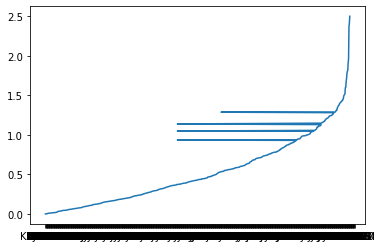

In [169]:
top,bottom = celllines_from_sums(e,f)
top2,bottom2 = celllines_from_diff(e,f)

In [166]:
e,f = uli_list1[2]
c,d = celllines_from_sums(e,f)

first is top, second is bottom


In [34]:
top2

['SNU308',
 'COGN305',
 'KARPAS422',
 'THP1',
 'KO52',
 'SNU182',
 'AML193',
 'DB',
 'BT12',
 'HDMYZ',
 'SUDHL10',
 'YD15',
 'SKUT1',
 'BT16',
 'TTC549',
 'ESO26',
 'FLO1',
 'HMY1',
 'MCC13',
 'UCH2']

In [52]:
data = pd.read_csv("/home/annerer/Downloads/elife-58925-supp1-v3.csv")

temp1 = data['CCLE_NAME'].to_list()
# split at space
for i in range(len(temp1)):
    temp1[i] = temp1[i].split("_") 

temp2 = []
for i in range(len(temp1)):
    temp2.append(temp1[i][0])


In [53]:
data['CCLE_NAME'] = temp2

In [90]:
data['CCLE_NAME']

0          MOLM16
1       PATU8988S
2          RCHACV
3         SKMEL31
4           SKBR3
          ...    
1021       HEC151
1022        SNU81
1023          GCT
1024        CMLT1
1025    NIHOVCAR3
Name: CCLE_NAME, Length: 1026, dtype: object

In [49]:
data[data['CCLE_NAME'].str.match('SKMEL31_SKIN')]

,CCLE_NAME,TISSUE_FACTOR,MSI,ACVR1B_mut_del,APC_mut_del,ARID1A_mut_del,ATM_mut_del,ATRX_mut_del,AXIN1_mut_del,BAP1_mut_del,...,PIK3CA_mut,BRAF_mut,CTNNB1_mut,KRAS_mut,NRAS_mut,GNAS_mut,HRAS_mut,EGFR_mut,MAP2K1_mut,PTPN11_mut
3,SKMEL31_SKIN,SKIN,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## Keeping only the Celllines in DepMap

In [45]:
effect = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/Achilles_gene_effect.csv")
data = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/sample_info.csv")

mapping = {}

for i in np.arange(0,data.shape[0],1):
    mapping[data.DepMap_ID[i]] = data.CCLE_Name[i]

effect["INDEX"] = effect.DepMap_ID
effect = effect.set_index('INDEX')
effect = effect.rename(index=mapping)
effect = effect.drop("DepMap_ID",1)

gene = effect.columns.to_list()
# split at space
for i in range(len(gene)):
    gene[i] = gene[i].split(" ") 

genes = []
for i in range(len(gene)):
    genes.append(gene[i][0])
                 
effect.columns = genes


cellLine = effect.index.to_list()
# split at space
for i in range(len(cellLine)):
    cellLine[i] = cellLine[i].split("_") 

cellLines = []
for i in range(len(cellLine)):
    cellLines.append(cellLine[i][0])
    
effect.index = cellLines

cellLine = data['CCLE_Name'].to_list()
# split at space
for i in range(len(cellLine)):
    cellLine[i] = cellLine[i].split("_") 

cellLines1 = []
for i in range(len(cellLine)):
    cellLines1.append(cellLine[i][0])
    
data['CCLE_Name'] = cellLines1


a = set(cellLines)
b = set(data["CCLE_Name"])
c = set.intersection(a,b)

print(len(a))
print(len(b))
print(len(c))

cellL = c

765
1781
765


In [55]:
effect = effect.transpose()
intersect = list(set.intersection(set(allGenes.index.to_list()), set(cellL)))
allGenes = effect[effect.columns.intersection(cellL)]

allGenes.shape
allGenes = allGenes.transpose()

allGenes.head()

In [64]:
allGenes.shape
allGenes = allGenes.transpose()

In [56]:
intersect = list(set.intersection(set(allGenes.index.to_list()), set(cellL)))

In [57]:
allGenes.shape

(18119, 783)

In [65]:
allGenes.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
HEL,0.178087,0.088290,-0.201464,-0.017011,0.042590,-0.192257,0.352891,-0.445209,0.292603,0.165168,...,-0.122795,-0.464567,NaN,NaN,0.258084,0.237593,-0.408563,0.291832,0.218575,-0.139759
HEL9217,-0.082364,0.239413,0.195457,0.163763,-0.188161,-0.338735,0.254489,-0.583878,-0.060615,0.015272,...,-0.195061,-0.408063,-0.155155,-0.067415,0.229242,-0.075883,-0.104001,0.075901,0.036985,-0.243303
LS513,0.070026,0.075066,-0.064637,0.156905,0.099075,0.141985,0.066314,-0.477023,-0.006855,0.291604,...,-0.093252,-0.276874,-0.049716,0.116683,0.211699,-0.012654,-0.351716,0.089140,-0.392549,-0.442624
C2BBE1,0.107048,-0.006352,-0.053166,0.053055,0.081620,-0.038305,0.082421,-0.642935,0.159178,0.064128,...,-0.280677,-0.230111,-0.106000,0.041611,0.083021,0.022771,-0.596777,0.197627,-0.106398,-0.549259
253J,0.280508,0.079860,0.016981,0.439139,-0.042239,-0.242560,0.103028,-0.419159,0.141445,0.115857,...,-0.410500,-0.507467,-0.138665,-0.119292,0.284407,0.158124,-0.240429,0.124847,-0.250949,-0.379117


### Now we have the cell lines that are only in DepMap. For these, we also need to update the names, so that we can easily compare which ones have which genetic background,

In [11]:
effect.shape

(769, 18119)

In [93]:
data.columns

Index(['CCLE_NAME', 'TISSUE_FACTOR', 'MSI', 'ACVR1B_mut_del', 'APC_mut_del',
       'ARID1A_mut_del', 'ATM_mut_del', 'ATRX_mut_del', 'AXIN1_mut_del',
       'BAP1_mut_del', 'BRCA1_mut_del', 'BRCA2_mut_del', 'CASP8_mut_del',
       'CDC73_mut_del', 'CDH1_mut_del', 'CDKN2A_mut_del', 'CEBPA_mut_del',
       'CIC_mut_del', 'CREBBP_mut_del', 'CYLD_mut_del', 'DAXX_mut_del',
       'EP300_mut_del', 'AMER1_mut_del', 'FBXW7_mut_del', 'GATA1_mut_del',
       'HNF1A_mut_del', 'KDM6A_mut_del', 'MAP3K1_mut_del', 'MEN1_mut_del',
       'MLH1_mut_del', 'KMT2C_mut_del', 'MSH2_mut_del', 'MSH6_mut_del',
       'NF1_mut_del', 'NF2_mut_del', 'NOTCH1_mut_del', 'NOTCH2_mut_del',
       'NPM1_mut_del', 'PAX5_mut_del', 'PIK3R1_mut_del', 'PTCH1_mut_del',
       'PTEN_mut_del', 'RB1_mut_del', 'RUNX1_mut_del', 'SMAD2_mut_del',
       'SMAD4_mut_del', 'SMARCA4_mut_del', 'SMARCB1_mut_del', 'SOCS1_mut_del',
       'STK11_mut_del', 'TET2_mut_del', 'TNFAIP3_mut_del', 'TP53_mut_del',
       'TSC1_mut_del', 'VHL_mut_de

In [64]:
data[data['CCLE_NAME'].str.match('YD8')].TP53_mut_del.to_list()

[1]

## It appears to be working  - 29.September

In [16]:
count = []
for _ in top:
    count.append(data[data['CCLE_NAME'].str.match(_)].MSI.to_list())
    
print(count)
#print(count/len(top))

count = [i for j in count for i in j]
print(sum(count)/len(top))

[[0], [0], [0], [0], [0], [1], [0], [], [1], [0], [0], [0], [0], [], [], [0], [0], [], [0], [0]]
0.1


In [ ]:
data = pd.read_csv("/home/annerer/Downloads/elife-58925-supp1-v3.csv")

In [35]:
count = []
for _ in top:
    count.append(data[data['CCLE_NAME'].str.match(_)].KRAS_mut.to_list())
    
#print(count)
#print(count/len(top))

count = [i for j in count for i in j]
print(sum(count)/len(top))

count = []
for _ in allGenes.columns.to_list():
    count.append(data[data['CCLE_NAME'].str.match(_)].EGFR_mut.to_list())
    
#print(count)
#print(count/len(top))

count = [i for j in count for i in j]
print(count)
print(sum(count)/len(allGenes))

0.0


#### for KRAS_mut we have 20% in top hits for every interaction of NF2, wheras we find 55% overall.
#### some hits for CDKs have 0% KRAS_mut in the top interactions.

In [105]:
def get_percentage(sample,mut):
    count = []
    for _ in sample:
        count.append(data[data['CCLE_NAME'].str.match(_)].eval(mut).to_list())
    
    count = [i for j in count for i in j]
    return(sum(count)/len(sample))

In [106]:
count = []
get_percentage(top,'EGFR_mut')

0.0

In [107]:
get_percentage(allGenes,'EGFR_mut')

0.0038314176245210726

In [ ]:
top,bottom = celllines_from_sums(e,f)
#top,bottom = celllines_from_diff(e,f)

In [ ]:
uli_list1 = [['CDK4','RB1'],['CDK4','CDKN2C'],['CDK4','CCND1'],['CDK6','CCND3'],['CDK6','CCNE1'],
             ['CDK6','CDK4'],['CDKN2A','CDKN2B'],['CDKN2A','CCNE1']]

uli_list2 = [['NF2','AMOTL2'],['NF2','KIRREL1'],['NF2','TAOK1'],['NF2','LATS2'],['NF2','PTPN14'],['NF2','PTEN'],
             ['NF2','ABL2'],['NF2','RAC1'],['NF2','CRK'],['NF2','DLG5'],['NF2','PKN2']]

In [142]:
#[ x for x in seventyone ]

for _ in seventyone:
    print(get_percentage(top,_), '   ' , get_percentage(allGenes,_))

0.05     0.002554278416347382


KeyboardInterrupt: 

In [137]:
seventyone = data.columns.to_list()

In [138]:
seventyone.pop(1)
seventyone.pop(1)
seventyone.pop(0)

'CCLE_NAME'

In [139]:
len(seventyone)

68

In [97]:
count = []
for _ in allGenes.columns.to_list():
    count.append(data[data['CCLE_NAME'].str.match(_)].EGFR_mut.to_list())
    
#print(count)
#print(count/len(top))

count = [i for j in count for i in j]
print(count)
print(sum(count)/len(allGenes))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0.0038314176245210726


In [86]:
count = 0
for _ in top:
    if data[data['CCLE_NAME'].str.match(_)].APC_mut_del.to_list() == 1:
        count += 1

print(count)
print(len(top))

0
20


In [28]:

for _ in top:
    data2 = data[data['CCLE_NAME'].str.match(top)]

print(count)
print(len(genes))

SyntaxError: unmatched ']' (<ipython-input-28-5d98798b7155>, line 2)

In [25]:
data[data['CCLE_NAME'].str.match(top[1])].MSI

623    1
Name: MSI, dtype: int64

In [34]:
# wir duerfen nicht alle zelllinien mitnehmen, nur die DepMap exclusives
sum(data.APC_mut_del)/len(data.APC_mut_del)

0.16569200779727095

In [36]:
len(data.APC_mut_del)    # es sind nicht alle 1026 in DepMap, nur um die 750

1026

In [ ]:
count = 0
for _ in top:
    if data[data.mutationX] == 1:
        count += 1
    return count/len(top)

In [ ]:
def calculate_genetic_background_percentage(cellLines,allcells,background):
    for _ in cellLines:
        # get the percentage of background in these cells
        cellLines_percentage = cellLines[cellLines[]]
    for _ in allcells:
        # get the percentage of backgournd in all cells
        allcells_percentage = allcells[allcells[]]
    # as a first instance, check for overrepresentation comparing these 2 values
    
    print('the background ' + background + ' is found in ' + background_percent + ' of all celllines' )
    print('the background ' + background + ' is found in ' + cellLines_percent + ' of the input celllines') 

In [ ]:
list1 = data[data.TP53_mut_del == 0]["CCLE_NAME"].to_list()
#list1 = [j for i in list1 for j in i]
# split at space
for i in range(len(list1)):
    list1[i] = list1[i].split("_") 

List1 = []
for i in range(len(list1)):
    List1.append(list1[i][0])
    
overlap = set.intersection(set(List1),set(cell_L))

In [81]:
def single_column(df,columns,nameOfNewCol):
    'takes list of columns and returns a Df of values'
    vals = df[columns].values.tolist()
    valsList = [j for x in vals for j in x]
    valsDf = pd.DataFrame(valsList,columns = [nameOfNewCol])
    return valsDf

In [25]:
def compare_groups(mutation,kogene):
    list1 = data[data[mutation] == 1]["CCLE_NAME"].to_list()
    mutation = set.intersection(set(list1),set(cellL))

    list2 = data[data[mutation] == 0]["CCLE_NAME"].to_list()
    noMutation = set.intersection(set(list2),set(cellL))

    ko_gene = effectCellL[effectCellL.index.str.startswith(kogene)]

    Df2 = single_column(ko_gene,mutation,'MUT')

    Df1 = single_column(ko_gene,noMutation,'WT')

    Df = pd.concat([Df1,Df2], axis=1, sort=False)
    Df.boxplot()

In [1]:
#compare_groups("NF2","TP53")

In [28]:
# we cycle through the conditions. for every condition (71), check the percentage in the top cell lines of the two genes, and in all cell lines
# after the function is done, this is a single for loop, or a list comprehension

## Idee:
wir schauen fuer alle paare, jeweils abhaengig vom split, die p-werte des hypergeometrischen tests fuer alle genetischen hintergruende an.
    sind diese signifikant oder nicht? wir lassen einfach ein skript ueber alle 68 hintergrunde fuer alle relevanten paare laufen und geben paar sowie hintergrund aus.
    danach ordnen wir nach p-value und schauen uns die signifikantesten an.
    wichtig: wir nehmen fuer positiv korrelierte nur summen und fuer negativ korrelierte nur differenzen.
    
### dh:
* cutoff festlegen (mit Juergen)
* mit cutoff die zelllinien in 2 sets splitten
* funktion schreiben die einen hypergeometrischen test mit diesen sets macht und das paar sowie den p-value dafuer zurueckgibt.
* danach ordnen und mit Uli durchgehen.